# <div align="center">UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS</div>
## <div align="center">Universidad del Perú. Decana de América</div>
### <div align="center">Facultad de Ingeniería de Sistemas e Informática</div>
#### <div align="center">Escuela Profesional de Ingeniería de Sistemas</div>


### Objetivos del laboratorio
➢ Reconocer la estructura de un catálogo de datos.<br>
➢ Identificar posibles aspectos a analizar en un catálogo de datos.<br>
➢ Identificar las técnicas apropiadas para un determinado aspecto analizar.<br>
➢ Aplicar una o varias técnicas de análisis en un catálogo de datos, con un objetivo de análisis previamente definido.<br>
➢ Comunicar de forma elocuente los resultados del análisis realizado. <br>
### Contexto y recursos
La empresa (ficticia) SAN MARCOS Health&Data” ha organizado un concurso público para la adjudicación de un proyecto de
ciencia de datos. De acuerdo con las bases del concurso, el proyecto se adjudicará al grupo de 5 personas que presente la
solución de más calidad a un problema dado, de acuerdo con las condiciones impuestas:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##  1. Exploración inicial de los datos


In [ ]:
# Cargar los conjuntos de datos
covid_data = pd.read_csv('covid.csv', delimiter=";")
obesity_data = pd.read_csv('data_obewsidad.csv')
# Visualizar las primeras filas de cada conjunto de datos
print("Primeras filas del conjunto de datos de COVID-19:")
covid_data.head()

Primeras filas del conjunto de datos de COVID-19:


,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,0,0,Afghanistan,Asia,NaN
1,0,0,Algeria,Africa,NaN
2,0,0,Armenia,Europe,NaN
3,0,0,Australia,Oceania,NaN
4,0,0,Austria,Europe,NaN


* <strong> Cases (Casos): </strong>  Esta columna representa el número total de casos de COVID-19 registrados en un determinado período de tiempo.
* <strong> Deaths (Muertes):</strong> Esta columna indica el número total de muertes atribuidas al COVID-19 en un período específico.
* <strong> CountriesAndTerritories (Países y territorios): </strong> Esta columna enumera los nombres de los países y territorios donde se han registrado los casos y las muertes de COVID-19.
* <strong> ContinentExp (Continente): </strong> Esta columna clasifica los países y territorios según su continente. Proporciona información sobre la ubicación geográfica de los lugares afectados por COVID-19.
* <strong> Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 (Número acumulativo de casos de COVID-19 por cada 100,000 personas en 14 días): </strong> Esta columna proporciona una medida de la incidencia del COVID-19 en un área determinada, expresada como el número acumulativo de casos por cada 100,000 personas durante un período de 14 días. Es una métrica importante para evaluar la propagación reciente del virus en una población.

In [ ]:
print("\nPrimeras filas del conjunto de datos de obesidad:")
obesity_data.head()


Primeras filas del conjunto de datos de obesidad:


,Unnamed: 0,2016,2016.1,2016.2
0,NaN,"Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr..."
1,NaN,18+ years,18+ years,18+ years
2,"Countries, territories and areas",Both sexes,Male,Female
3,Afghanistan,19.7 [15.8-24.0],17.1 [11.8-23.6],22.2 [16.8-28.5]
4,Albania,58.7 [53.8-63.5],64.9 [57.9-71.4],52.8 [45.8-59.6]


In [ ]:
# Eliminar las filas 0, 1 y 2 de obesity_data
obesity_data = obesity_data.drop([0, 1, 2])

# Imprimir las primeras filas del conjunto de datos de obesidad después de eliminar las filas
print("\nPrimeras filas del conjunto de datos de obesidad después de eliminar las filas 0, 1 y 2:")
obesity_data.head()


Primeras filas del conjunto de datos de obesidad después de eliminar las filas 0, 1 y 2:


,Unnamed: 0,2016,2016.1,2016.2
3,Afghanistan,19.7 [15.8-24.0],17.1 [11.8-23.6],22.2 [16.8-28.5]
4,Albania,58.7 [53.8-63.5],64.9 [57.9-71.4],52.8 [45.8-59.6]
5,Algeria,60.7 [56.0-65.4],56.7 [49.7-63.5],64.8 [58.3-71.0]
6,Andorra,68.1 [63.1-72.7],74.5 [67.8-80.3],61.9 [54.6-68.8]
7,Angola,23.9 [19.0-29.2],17.2 [10.9-24.1],30.4 [23.1-38.5]


* <strong>2016:</strong> Esta columna parece describir la prevalencia de sobrepeso entre adultos de ambos sexos, medida por el Índice de Masa Corporal (IMC).

* <strong>2016.1:</strong> Esta columna parece describir la prevalencia de sobrepeso entre adultos, pero desglosada por género masculino.

* <strong>2016.2: </strong>Esta columna parece describir la prevalencia de sobrepeso entre adultos, pero desglosada por género femenino.

##  2. Cambios de nombres

In [ ]:
colum1=["Casos","Muertes","Pais","Continente","CasosPorCada100,000Personas14Dias"]
colum2=["Pais","2016AmbosSexos","2016Masculino","2016Mujer"]
covid_data.columns=colum1
obesity_data.columns=colum2
covid_data.describe()


,Casos,Muertes,"CasosPorCada100,000Personas14Dias"
count,61900.000000,61900.000000,59021.000000
mean,1155.147237,26.055460,66.320586
std,6779.224479,131.227055,162.329240
min,-8261.000000,-1918.000000,-147.419587
25%,0.000000,0.000000,0.757526
50%,15.000000,0.000000,6.724045
75%,273.000000,4.000000,52.572719
max,234633.000000,4928.000000,1900.836210


In [ ]:
print("\nResumen estadístico del conjunto de datos de obesidad:")
obesity_data.iloc[3:].describe()


Resumen estadístico del conjunto de datos de obesidad:


,Pais,2016AmbosSexos,2016Masculino,2016Mujer
count,192,192,192,192
unique,192,189,189,189
top,Andorra,No data,No data,No data
freq,1,4,4,4


Lo que haremos es extraer el valor central el cual es la estimación bruta del sobrepeso en los adultos, para ello utilizamos la función procesar_dato, si exite algun error con el dato extraído, se devolverá nan. De esta forma va a ocurrir una iteación a todas las columnas del DataFrame y se aplicará la extracción.

In [ ]:
def procesar_dato(dato):
    try:
        valor_central, _ = dato.split(' [')
        return float(valor_central)
    except ValueError:
        return float('nan')


for col in obesity_data.columns[1:]:  # Excluyendo la primera columna 'Countries'
    obesity_data[col] = obesity_data[col].apply(procesar_dato)

# Imprimir estadísticas descriptivas para los valores centrales
print("Estadísticas descriptivas para los valores centrales:")

obesity_data.describe()

Estadísticas descriptivas para los valores centrales:


,2016AmbosSexos,2016Masculino,2016Mujer
count,191.000000,191.000000,191.000000
mean,48.544503,46.599476,50.510471
std,18.326388,21.670282,16.212880
min,17.900000,11.800000,20.300000
25%,29.000000,23.150000,33.400000
50%,54.800000,51.400000,55.000000
75%,62.550000,66.450000,61.300000
max,87.900000,87.600000,88.300000


##  3. Preprocesamiento de datos

### 3.1. Eliminación de datos nulos

In [ ]:
print("Datos Nulos del dataset covid.csv:")
covid_data.isnull().sum()

Datos Nulos del dataset covid.csv:


Casos                                   0
Muertes                                 0
Pais                                    0
Continente                              0
CasosPorCada100,000Personas14Dias    2879
dtype: int64

In [ ]:
print("Datos Nulos del dataset data_obesity.csv:")
obesity_data.isnull().sum()

Datos Nulos del dataset data_obesity.csv:


Pais              0
2016AmbosSexos    4
2016Masculino     4
2016Mujer         4
dtype: int64

Se procede a eliminar los datos nulos, con el fin de realizar una limpieza.

In [ ]:
# Tratar valores faltantes o nulos
covid_data.dropna(inplace=True)
obesity_data.dropna(inplace=True)
print("Contar datos nulos:")
covid_data.isnull().sum()

Contar datos nulos:


Casos                                0
Muertes                              0
Pais                                 0
Continente                           0
CasosPorCada100,000Personas14Dias    0
dtype: int64

In [ ]:
print("Contar datos nulos:")
obesity_data.isnull().sum()

Contar datos nulos:


Pais              0
2016AmbosSexos    0
2016Masculino     0
2016Mujer         0
dtype: int64

### 3.2. Manejo de valores atípicos
 Los datos atípicos son observaciones que se desvían significativamente del resto de los datos en un conjunto de datos, ya sea en términos de su valor numérico o de su distribución.
 Para ello, se realizó mediante el método del rango intercuartílico (IQR).
#### 3.2.1. Método del rango intercuartílico (IQR):
Este método utiliza el rango intercuartílico para identificar los valores atípicos. El rango intercuartílico se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores que se encuentran por encima de Q3 + 1.5 * IQR o por debajo de Q1 - 1.5 * IQR se consideran atípicos y pueden ser eliminados.
<br>
<br>
Primero se evidencia los datos obtenidos después de la eliminación de datos nulos, posterior se realiza el IQR a cada de una columnas del dataset en mención, tanto para covid como para la obesidad. Y para validar se muestra que datos han sido eliminados como también del nuevo conjunto de datos sus estadísticas.

In [ ]:
covid_data

,Casos,Muertes,Pais,Continente,"CasosPorCada100,000Personas14Dias"
805,0,0,Afghanistan,Asia,0.000000
806,0,0,Algeria,Africa,0.000000
807,0,0,Armenia,Europe,0.000000
808,0,0,Australia,Oceania,0.000000
809,0,0,Austria,Europe,0.000000
...,...,...,...,...,...
61894,2,0,Vietnam,Asia,0.055981
61896,0,0,Western Sahara,Africa,0.000000
61897,0,0,Yemen,Asia,0.020575
61898,57,1,Zambia,Africa,3.728787


In [ ]:
# Seleccionar solo las columnas numéricas para calcular el rango intercuartílico
numeric_cols = covid_data.select_dtypes(include='number')

# Calcular el rango intercuartílico para cada columna numérica
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores atípicos
covid_data_filtrado = covid_data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar el conjunto de datos filtrado
covid_data_filtrado


,Casos,Muertes,Pais,Continente,"CasosPorCada100,000Personas14Dias"
805,0,0,Afghanistan,Asia,0.000000
806,0,0,Algeria,Africa,0.000000
807,0,0,Armenia,Europe,0.000000
808,0,0,Australia,Oceania,0.000000
809,0,0,Austria,Europe,0.000000
...,...,...,...,...,...
61894,2,0,Vietnam,Asia,0.055981
61896,0,0,Western Sahara,Africa,0.000000
61897,0,0,Yemen,Asia,0.020575
61898,57,1,Zambia,Africa,3.728787


In [ ]:
covid_data_filtrado.describe()

,Casos,Muertes,"CasosPorCada100,000Personas14Dias"
count,43880.000000,43880.000000,43880.000000
mean,62.819576,0.978737,13.938278
std,130.434113,2.225823,25.772183
min,-209.000000,-5.000000,-1.262589
25%,0.000000,0.000000,0.235922
50%,4.000000,0.000000,2.707040
75%,52.000000,1.000000,12.887915
max,772.000000,12.000000,130.284084


In [ ]:
# Identificar los índices de las filas eliminadas
indices_filas_eliminadas = covid_data.index.difference(covid_data_filtrado.index)

# Mostrar las filas eliminadas
valores_atipicos_eliminados = covid_data.loc[indices_filas_eliminadas]
valores_atipicos_eliminados

,Casos,Muertes,Pais,Continente,"CasosPorCada100,000Personas14Dias"
1623,441,15,China,Asia,0.088158
1690,665,15,China,Asia,0.134539
1757,787,25,China,Asia,0.189429
1824,1753,25,China,Asia,0.311693
1891,1466,26,China,Asia,0.413940
...,...,...,...,...,...
61884,15627,249,Ukraine,Europe,404.574361
61885,1194,8,United Arab Emirates,Asia,175.998713
61886,18447,144,United Kingdom,Europe,348.216139
61888,189723,1340,United States of America,America,873.211592


In [ ]:
obesity_data

,Pais,2016AmbosSexos,2016Masculino,2016Mujer
3,Afghanistan,19.7,17.1,22.2
4,Albania,58.7,64.9,52.8
5,Algeria,60.7,56.7,64.8
6,Andorra,68.1,74.5,61.9
7,Angola,23.9,17.2,30.4
...,...,...,...,...
193,Venezuela (Bolivarian Republic of),62.6,62.0,63.2
194,Viet Nam,18.3,15.9,20.5
195,Yemen,42.3,38.3,46.3
196,Zambia,23.9,16.7,31.0


De igual forma se evidencia para el dataset de obesidad

In [ ]:
# Seleccionar solo las columnas numéricas para calcular el rango intercuartílico
numeric2_cols = obesity_data.select_dtypes(include='number')

# Calcular el rango intercuartílico para cada columna numérica
Q11 = numeric2_cols.quantile(0.25)
Q33 = numeric2_cols.quantile(0.75)
IQR2 = Q33 - Q11

# Filtrar los valores atípicos
obesity_data_filtrado = obesity_data[~((numeric2_cols < (Q11 - 1.5 * IQR2)) | (numeric2_cols > (Q33 + 1.5 * IQR2))).any(axis=1)]

# Mostrar el conjunto de datos filtrado
obesity_data_filtrado

,Pais,2016AmbosSexos,2016Masculino,2016Mujer
3,Afghanistan,19.7,17.1,22.2
4,Albania,58.7,64.9,52.8
5,Algeria,60.7,56.7,64.8
6,Andorra,68.1,74.5,61.9
7,Angola,23.9,17.2,30.4
...,...,...,...,...
193,Venezuela (Bolivarian Republic of),62.6,62.0,63.2
194,Viet Nam,18.3,15.9,20.5
195,Yemen,42.3,38.3,46.3
196,Zambia,23.9,16.7,31.0


In [ ]:
# Identificar los índices de las filas eliminadas
indices_filas_eliminadas = obesity_data.index.difference(obesity_data_filtrado.index)

# Mostrar las filas eliminadas
valores_atipicos_eliminados = obesity_data.loc[indices_filas_eliminadas]
valores_atipicos_eliminados

,Pais,2016AmbosSexos,2016Masculino,2016Mujer


In [ ]:
obesity_data_filtrado.describe()

,2016AmbosSexos,2016Masculino,2016Mujer
count,191.000000,191.000000,191.000000
mean,48.544503,46.599476,50.510471
std,18.326388,21.670282,16.212880
min,17.900000,11.800000,20.300000
25%,29.000000,23.150000,33.400000
50%,54.800000,51.400000,55.000000
75%,62.550000,66.450000,61.300000
max,87.900000,87.600000,88.300000


In [ ]:
covid_data.loc[:, 'Pais'] = covid_data['Pais'].str.strip()
obesity_data.loc[:, 'Pais'] = obesity_data['Pais'].str.strip()


## 4. Análisis exploratorio de datos (EDA):

### 4.1. Análisis univariante
El análisis univariado se centra en una sola variable a la vez.

Estadísticas descriptivas para casos de COVID-19:
              Casos       Muertes  CasosPorCada100,000Personas14Dias
count  43880.000000  43880.000000                       43880.000000
mean      62.819576      0.978737                          13.938278
std      130.434113      2.225823                          25.772183
min     -209.000000     -5.000000                          -1.262589
25%        0.000000      0.000000                           0.235922
50%        4.000000      0.000000                           2.707040
75%       52.000000      1.000000                          12.887915
max      772.000000     12.000000                         130.284084


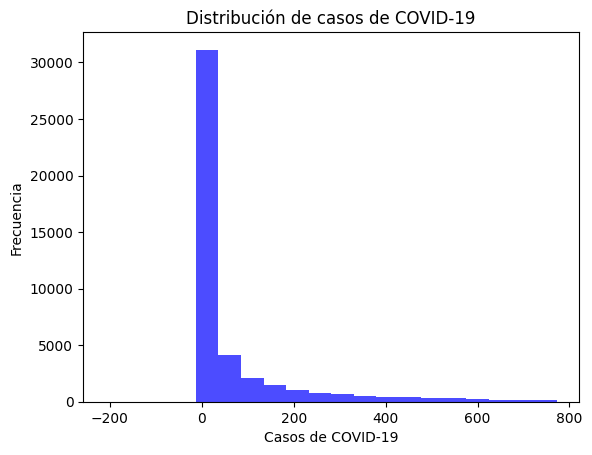

In [ ]:
# Estadísticas descriptivas
print("Estadísticas descriptivas para casos de COVID-19:")
print(covid_data_filtrado.describe())

# Gráficos y visualizaciones
import matplotlib.pyplot as plt

# Histograma de casos de COVID-19
plt.hist(covid_data_filtrado['Casos'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Casos de COVID-19')
plt.ylabel('Frecuencia')
plt.title('Distribución de casos de COVID-19')
plt.show()

Se puede observar como ha ido disminuendo la frecuencia de los casos COVID-19 en el histograma sugiere una tendencia decreciente en la propagación del virus. Esto podría ser el resultado de medidas de salud pública, como el distanciamiento social, el uso de mascarillas, campañas de vacunación, o cualquier otro factor que haya contribuido a reducir la transmisión del virus.

### 4.2. Análisis bivariado
Se centra en dos variables a la vez.

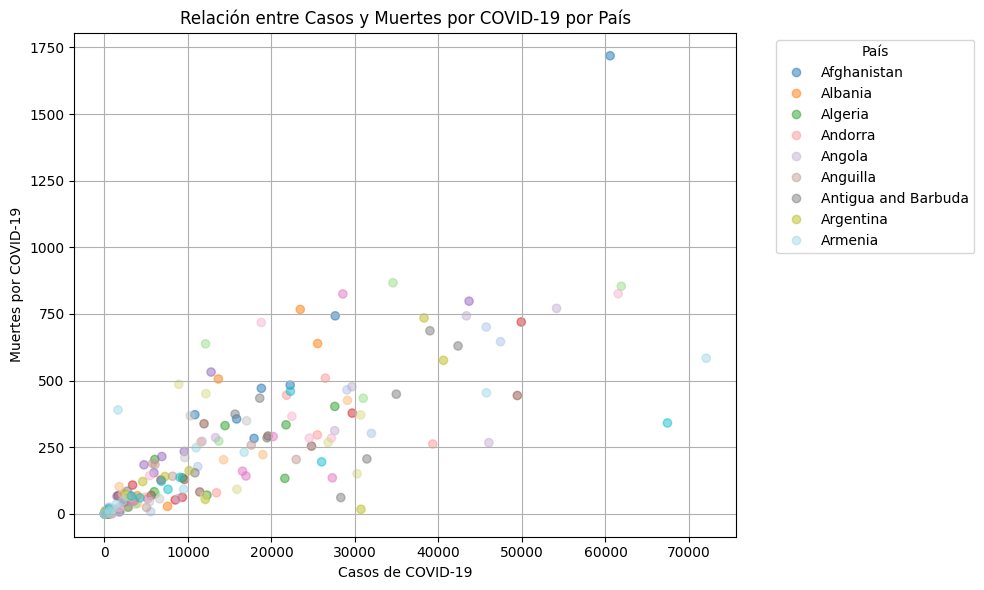

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar los datos por país y sumar los casos y muertes
datos_por_pais = covid_data_filtrado.groupby('Pais').agg({'Casos': 'sum', 'Muertes': 'sum'}).reset_index()

# Crear un diccionario que mapee los nombres de los países a valores numéricos únicos
pais_a_numero = {pais: i for i, pais in enumerate(datos_por_pais['Pais'])}

# Crear una lista de valores numéricos correspondientes a cada país
pais_numerico = np.array([pais_a_numero[pais] for pais in datos_por_pais['Pais']])

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(datos_por_pais['Casos'], datos_por_pais['Muertes'], c=pais_numerico, cmap='tab20', alpha=0.5)

# Agregar la leyenda de color
handles, labels = scatter.legend_elements()
plt.legend(handles, datos_por_pais['Pais'], title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Relación entre Casos y Muertes por COVID-19 por País')
plt.xlabel('Casos de COVID-19')
plt.ylabel('Muertes por COVID-19')

# Ajustes de diseño
plt.grid(True)
plt.tight_layout()

# Mostrar el diagrama de dispersión
plt.show()


Cada punto en el gráfico representa un país. El eje x representa el número de casos de COVID-19 y el eje y representa el número de muertes por COVID-19 en cada país. Los puntos están coloreados de acuerdo con un mapa de colores (tab20) que asigna un color único a cada grupo de países. Cada color representa un grupo de países diferentes. Por lo tanto, los puntos del mismo color pertenecen al mismo grupo de países. Así mismo, se evidencia un pico alto en más de 60100 casos covid-19 la mortalidad fue de 1730 aproximadamente.

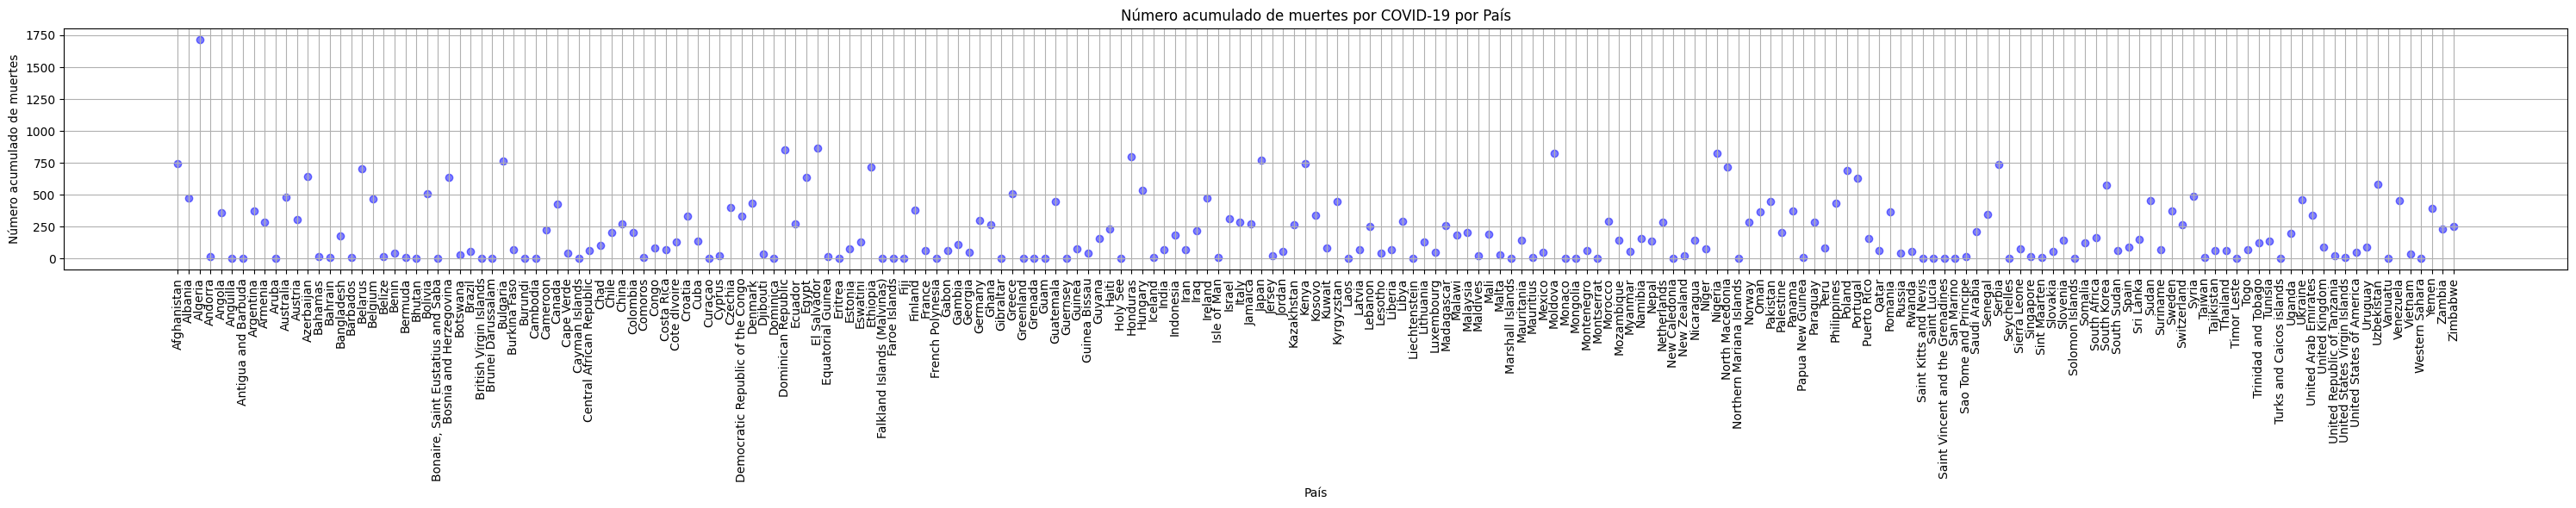

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por país y sumar las muertes
muertes_por_pais = covid_data_filtrado.groupby('Pais')['Muertes'].sum().reset_index()

# Crear el diagrama de dispersión
plt.figure(figsize=(30, 6))
plt.scatter(muertes_por_pais['Pais'], muertes_por_pais['Muertes'], color='blue', alpha=0.5)
plt.title('Número acumulado de muertes por COVID-19 por País')
plt.xlabel('País')
plt.ylabel('Número acumulado de muertes')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Ajustes de diseño
plt.grid(True)
plt.tight_layout()

# Mostrar el diagrama de dispersión
plt.show()


El índice de mortalidad más alto fue en Algeria bordeando las 1750 muertes.

### 4.3. Análisis multivariado

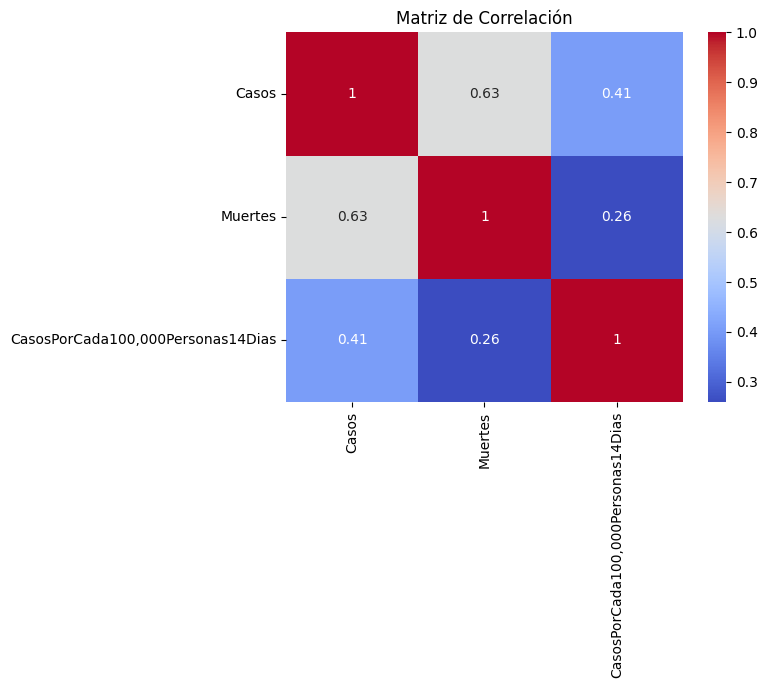

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes
data_subset = covid_data_filtrado[['Casos', 'Muertes', 'CasosPorCada100,000Personas14Dias']]

# Calcular la matriz de correlación
correlation_matrix = data_subset.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Se hizo la correlación con respecto a 3 variables las cuales son:
* Casos
* Muertes
* Numéro de casos acumulativo por cada 100 000 Personas en 14 días
Se concluye que:
* A medida que aumentan los casos , también tienden a tener más muertes por COVID-19. Teniendo una correlación de 0.63 indicando una correlación positiva moderada.
* El coeficiente de correlación de 0.41 entre el número de casos acumulativos por cada 100,000 personas en 14 días y el número total de casos de COVID-19 sugiere una correlación moderada positiva. Sin embargo, esta correlación no implica necesariamente una relación causal directa y otros factores pueden influir en esta asociación.
* El coeficiente de correlación de 0.26 entre el número de casos acumulativos por cada 100,000 personas en 14 días y el número total de muertes sugiere una correlación positiva débil, indicando que un aumento en los casos por cada 100,000 personas en 14 días tiende a estar asociado con un leve aumento en el número total de muertes por COVID-19.

### RELACIÓN DE COVID19 CON DATOS DE LA OBESIDAD POR PAIS

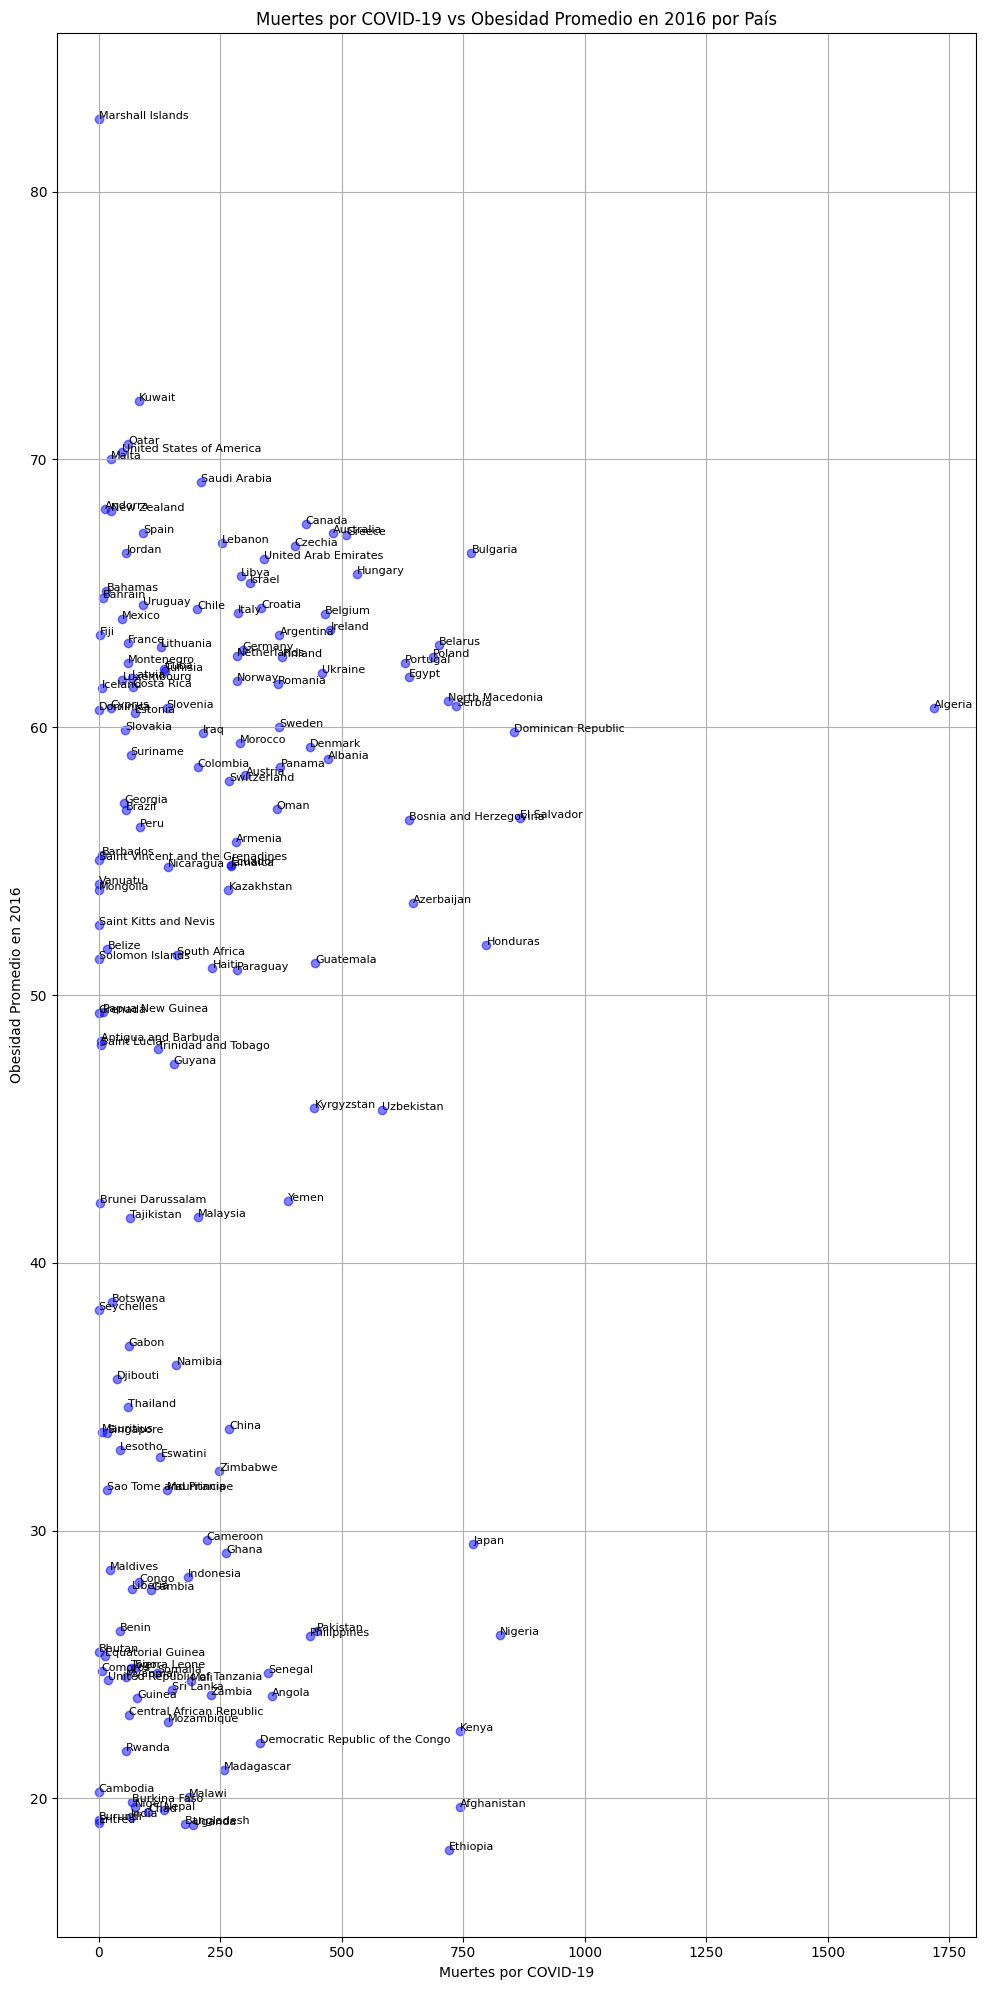

In [ ]:
import matplotlib.pyplot as plt

# Calcular el índice promedio de obesidad para cada país en 2016
obesidad_2016_por_pais = obesity_data_filtrado.groupby('Pais')[['2016AmbosSexos', '2016Masculino', '2016Mujer']].mean().mean(axis=1)
obesidad_2016_por_pais = obesidad_2016_por_pais.reset_index()
obesidad_2016_por_pais.columns = ['Pais', 'Promedio_2016']

# Sumar las muertes por COVID-19 por país
muertes_por_pais = covid_data_filtrado.groupby('Pais')['Muertes'].sum().reset_index()

# Combinar los DataFrames por país
datos_combinados = pd.merge(muertes_por_pais, obesidad_2016_por_pais, on='Pais', how='inner')

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 20))
plt.scatter(datos_combinados['Muertes'], datos_combinados['Promedio_2016'], color='blue', alpha=0.5)
plt.title('Muertes por COVID-19 vs Obesidad Promedio en 2016 por País')
plt.xlabel('Muertes por COVID-19')
plt.ylabel('Obesidad Promedio en 2016')

# Añadir etiquetas de país a los puntos
for i, pais in enumerate(datos_combinados['Pais']):
    plt.annotate(pais, (datos_combinados['Muertes'][i], datos_combinados['Promedio_2016'][i]), fontsize=8)

# Ajustes de diseño
plt.grid(True)
plt.tight_layout()

# Mostrar el diagrama de dispersión
plt.show()


Se evidencia que la mayoría de muertes por Covid-19 por pais, presenta una tasa de obesidad mayor al 30%